# Perceptron multi capa con PyTorch

In [39]:
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class MLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
def train_model(model, x, y, x_test, y_test, criterion, optimizer, num_epochs):
    train_loss_list = []
    test_loss_list = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(num_epochs):
        model.train()

        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 50 == 0:
            train_loss_list.append(loss.item())
            accuracy = (outputs.data.argmax(dim=1) == y.argmax(dim=1)).sum().item() / y.size(0)
            train_acc_list.append(accuracy)
            model.eval()
            with torch.no_grad():
                outputs = model(x_test)
                test_loss = criterion(outputs, y_test)
                predicted = outputs.data.argmax(dim=1)
                accuracy = (predicted == y_test.argmax(dim=1)).sum().item() / y_test.size(0)
                test_loss_list.append(test_loss)
                test_acc_list.append(accuracy)
                print(f'Epoch: [{epoch + 1}/{num_epochs}], Loss: { loss.item() } Accuracy on test: {accuracy:.4f}')

    return train_loss_list, test_loss_list, train_acc_list, test_acc_list

In [48]:
df = pd.read_csv('./music_data/features_30_sec.csv', delimiter=',')

X = df.drop(columns=['label', 'filename', 'length'], axis=1)
y = df['label']

y_encoded = pd.get_dummies(df['label'], dtype='float').values
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

Epoch: [50/500], Loss: 1.350976824760437 Accuracy on test: 0.4600
Epoch: [100/500], Loss: 1.0472314357757568 Accuracy on test: 0.5500
Epoch: [150/500], Loss: 0.845075249671936 Accuracy on test: 0.5950
Epoch: [200/500], Loss: 0.706555187702179 Accuracy on test: 0.6550
Epoch: [250/500], Loss: 0.6082388758659363 Accuracy on test: 0.6700
Epoch: [300/500], Loss: 0.5331692099571228 Accuracy on test: 0.7150
Epoch: [350/500], Loss: 0.4719383120536804 Accuracy on test: 0.7100
Epoch: [400/500], Loss: 0.4200644791126251 Accuracy on test: 0.7250
Epoch: [450/500], Loss: 0.37532714009284973 Accuracy on test: 0.7150
Epoch: [500/500], Loss: 0.3363453149795532 Accuracy on test: 0.7150


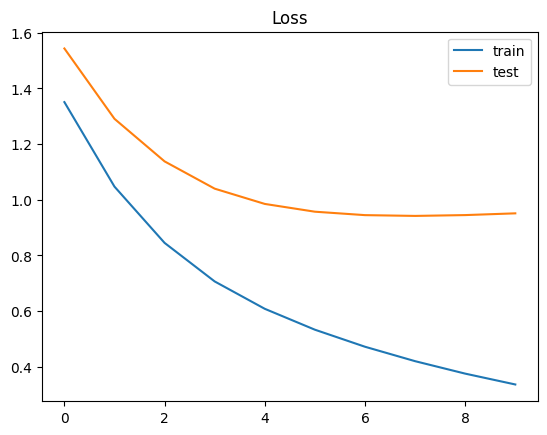

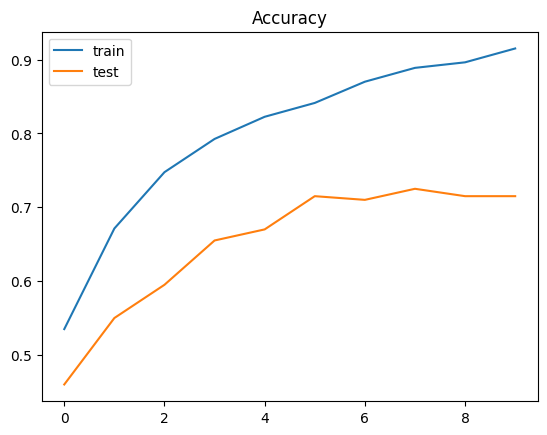

In [49]:
input_size = X_train.shape[1]
output_size = y_encoded.shape[1]

model = MLP(input_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs =  500

train_loss, test_loss, train_acc, test_acc = train_model(
    model, 
    X_train_tensor, 
    y_train_tensor, 
    X_test_tensor, 
    y_test_tensor, 
    criterion, 
    optimizer, 
    num_epochs
)

plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.title('Accuracy')
plt.legend()
plt.show()

In [52]:
df = pd.read_csv('./music_data/features_reduced.csv', delimiter=',')

X = df.iloc[:, :32]
y = df.iloc[:, 32:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

Epoch: [50/500], Loss: 1.4456651210784912 Accuracy on test: 0.3900
Epoch: [100/500], Loss: 1.1225606203079224 Accuracy on test: 0.4800
Epoch: [150/500], Loss: 0.9517658948898315 Accuracy on test: 0.5100
Epoch: [200/500], Loss: 0.8498576879501343 Accuracy on test: 0.5300
Epoch: [250/500], Loss: 0.782050371170044 Accuracy on test: 0.5550
Epoch: [300/500], Loss: 0.732046365737915 Accuracy on test: 0.5600
Epoch: [350/500], Loss: 0.6922764778137207 Accuracy on test: 0.5750
Epoch: [400/500], Loss: 0.6588835120201111 Accuracy on test: 0.5900
Epoch: [450/500], Loss: 0.6296828389167786 Accuracy on test: 0.6000
Epoch: [500/500], Loss: 0.6033339500427246 Accuracy on test: 0.5950


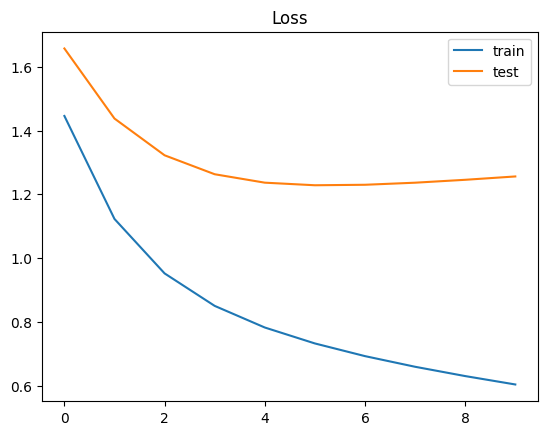

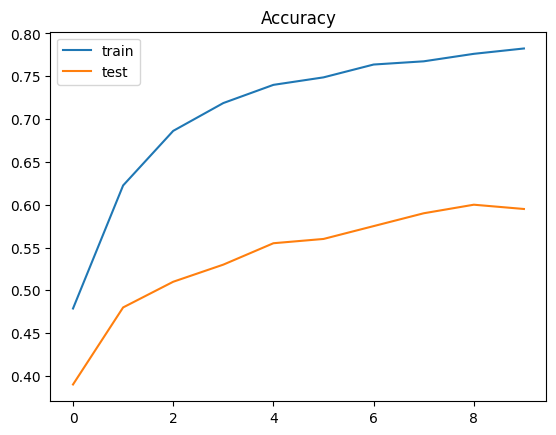

In [61]:
input_size = X_train.shape[1]
output_size = y.shape[1]

model = MLP(input_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs =  500

train_loss, test_loss, train_acc, test_acc = train_model(
    model, 
    X_train_tensor, 
    y_train_tensor, 
    X_test_tensor, 
    y_test_tensor, 
    criterion, 
    optimizer, 
    num_epochs
)

plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.title('Accuracy')
plt.legend()
plt.show()